# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
### YOUR CODE HERE ###
df = pd.read_csv('data/Mall_Customers.csv')
#df = pd.read_csv('/content/drive/MyDrive/Skillbox/Advanced/Clening/data/Mall_Customers.csv')
print(df.shape)
df.head(5)

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

#### Пропуски

In [86]:
# Получаем количество пропусков
missing_values = df.isna().sum()
# Получаем процент пропусков
missing_percentage = (missing_values / df.shape[0]) * 100
# Объединяем в один DataFrame
missing_info = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percentage
})
# Создаем переменную с пропусками
missing_info = missing_info[missing_info['Количество пропусков'] > 0]
print(missing_info)

                    Количество пропусков  Процент пропусков
Genre                                 19                9.5
Age                                   20               10.0
Annual Income (k$)                    20               10.0


In [ ]:
# посмотрим пропуски больше 3-х в строке
df_miss_row = df[df.isna().sum(axis=1) >= 3]
df_miss_row.shape

(0, 5)

In [ ]:
# удалим строки с пропусками > 3
df = df[df.isna().sum(axis=1) < 3]
df.shape

(200, 5)

In [ ]:
df[df.isna().sum(axis=1) >= 3]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


#### Распределение признков

In [87]:
num_cols = df.select_dtypes(include=['number']).drop(['CustomerID'], axis=1)
num_cols

,Age,Annual Income (k$),Spending Score (1-100)
0,19.0,15.0,39
1,NaN,NaN,81
2,NaN,16.0,6
3,23.0,16.0,77
4,31.0,17.0,40
...,...,...,...
195,35.0,120.0,79
196,45.0,126.0,28
197,32.0,126.0,74
198,NaN,137.0,18


Histogram for Age


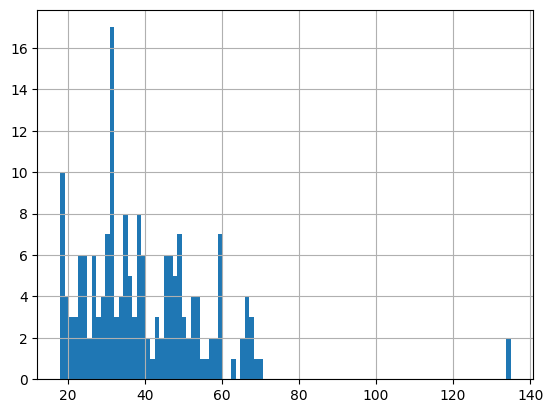

Histogram for Annual Income (k$)


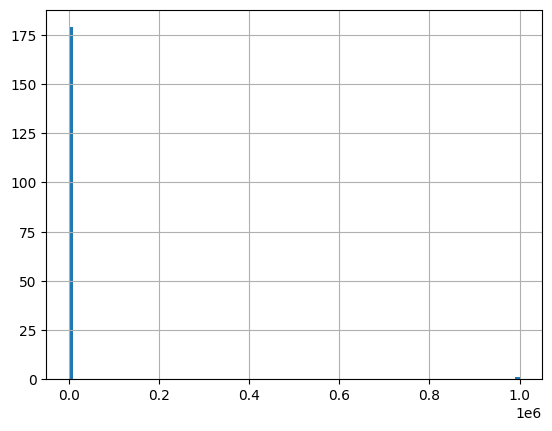

Histogram for Spending Score (1-100)


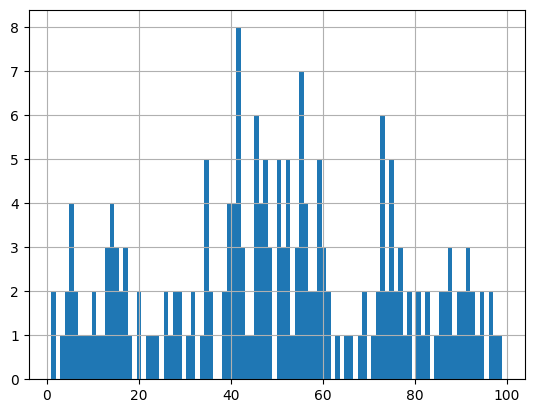

In [88]:
for col in num_cols:
  print(f'Histogram for {col}')
  df[col].hist(bins=100)
  plt.show()

#### Выбросы и аномалии

In [89]:
def calculate_iqr_boundaries(series):
  q25 = series.quantile(0.25)
  q75 = series.quantile(0.75)
  iqr = q75 - q25

  boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
  return boundaries

------- Age -------
Размах (-1.0, 79.0)
Количество выбросов 0 2


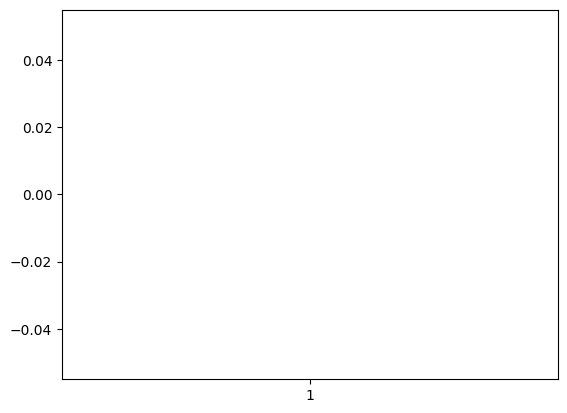

=======+++++++=======
------- Annual Income (k$) -------
Размах (-12.0, 132.0)
Количество выбросов 0 3


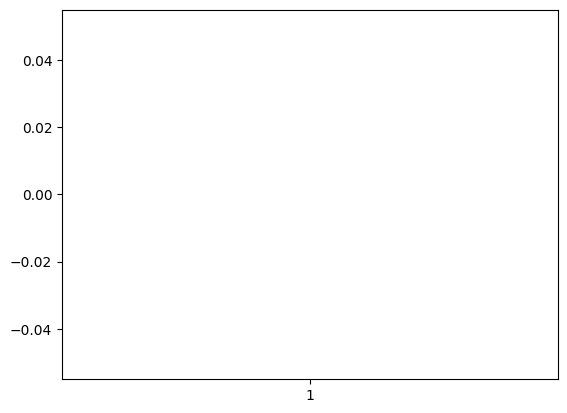

=======+++++++=======
------- Spending Score (1-100) -------
Размах (-22.625, 130.375)
Количество выбросов 0 0


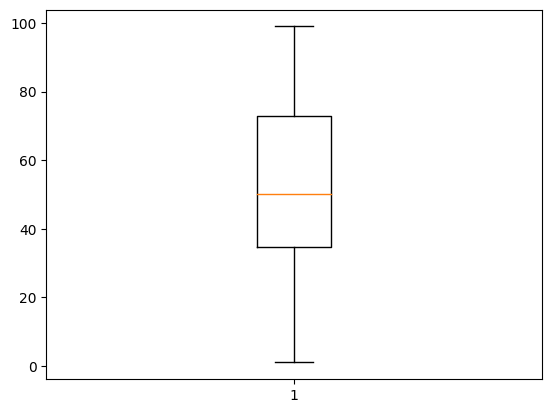

=======+++++++=======


In [90]:
for i in num_cols:
    bounds = calculate_iqr_boundaries(df[i])
    out_l = sum(df[i] < bounds[0])
    out_r = sum(df[i] > bounds[1])
    print('-------', i, '-------')
    print('Размах', bounds)
    print('Количество выбросов', out_l, out_r)
    plt.boxplot(df[i])
    plt.show()
    print('=======+++++++=======')

Попробуем посмотреть по другому

------- Age -------
Размах (-1.0, 79.0)
Количество выбросов 2


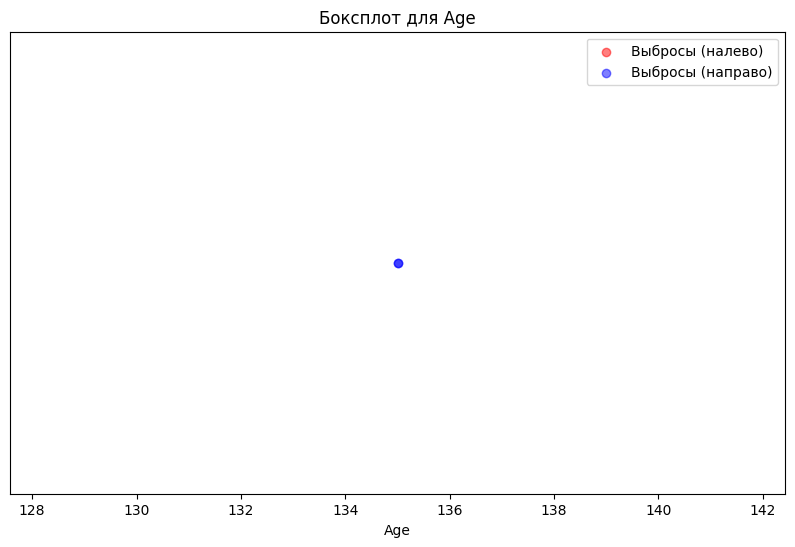

=======+++++++=======
------- Annual Income (k$) -------
Размах (-12.0, 132.0)
Количество выбросов 3


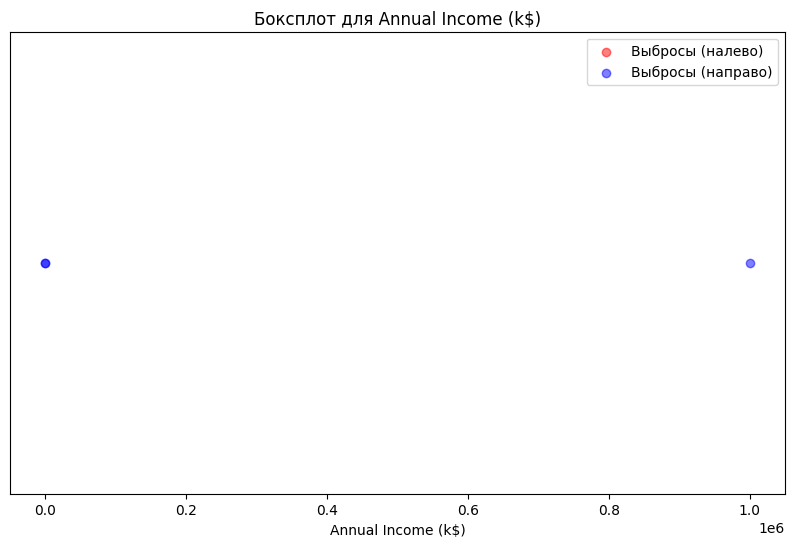

=======+++++++=======
------- Spending Score (1-100) -------
Размах (-22.625, 130.375)
Количество выбросов 0


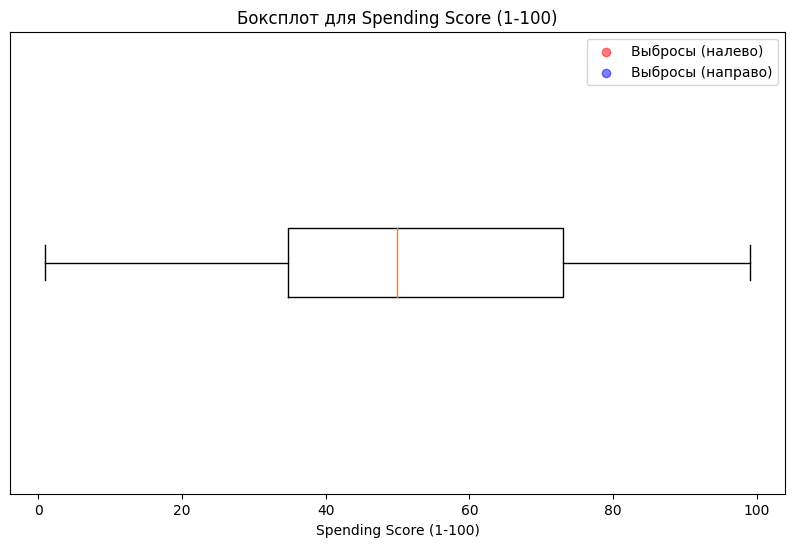

=======+++++++=======


In [91]:
for i in num_cols:
    bounds = calculate_iqr_boundaries(df[i])
    out_l = df[i] < bounds[0]
    out_r = df[i] > bounds[1]
    # Общее количество выбросов
    num_outliers = sum(out_l) + sum(out_r)
    print('-------', i, '-------')
    print('Размах', bounds)
    print('Количество выбросов', num_outliers)
    # Создание боксплота
    plt.figure(figsize=(10, 6))
    # Визуализация боксплота
    plt.boxplot(df[i], vert=False)
    # Добавление данных на график
    plt.scatter(df[i][out_l], [1] * sum(out_l), color='red', label='Выбросы (налево)', alpha=0.5)
    plt.scatter(df[i][out_r], [1] * sum(out_r), color='blue', label='Выбросы (направо)', alpha=0.5)
    plt.title(f'Боксплот для {i}')
    plt.xlabel(i)
    plt.yticks([])  # Убираем ось y для чистоты
    plt.legend()
    plt.show()
    print('=======+++++++=======')

<Axes: >

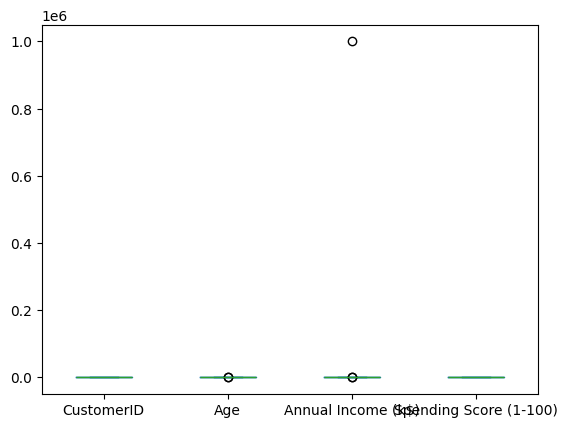

In [ ]:
df.plot(kind='box')

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [92]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=1)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [93]:
missing_info

,Количество пропусков,Процент пропусков
Genre,19,9.5
Age,20,10.0
Annual Income (k$),20,10.0


In [94]:
print(X_train['Genre'].dtypes)
print(X_train['Genre'].value_counts())
print(X_train[X_train['Genre'].isnull()])

object
Genre
Female     77
Male       67
Feemale     1
Name: count, dtype: int64
     CustomerID Genre    Age  Annual Income (k$)  Spending Score (1-100)
56           57   NaN   51.0                44.0                      50
185         186   NaN   30.0                99.0                      97
123         124   NaN   39.0                 NaN                      91
106         107   NaN    NaN                63.0                      50
199         200   NaN   30.0               137.0                      83
54           55   NaN   50.0                 NaN                      45
84           85   NaN   21.0                54.0                      57
154         155   NaN   47.0                78.0                      16
6             7   NaN  135.0                18.0                       6
32           33   NaN   53.0                33.0                       4
170         171   NaN   40.0                87.0                      13
135         136   NaN   29.0               

In [96]:
# Заполним пропуски в Genre Модой  strategy='most_frequent'
imp_mode = SimpleImputer(strategy='most_frequent')

mode_cols = ['Genre']

X_train[mode_cols] = imp_mode.fit_transform(X_train[mode_cols])

print(X_train[X_train['Genre'].isnull()])

Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [97]:
print(X_train['Age'].dtypes)
#print(X_train['Age'].value_counts())
print(X_train[X_train['Age'].isnull()])

float64
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
106         107  Female  NaN                63.0                      50
116         117  Female  NaN                65.0                      43
183         184  Female  NaN                98.0                      88
45           46  Female  NaN                39.0                      65
36           37  Female  NaN                34.0                      17
2             3  Female  NaN                16.0                       6
70           71    Male  NaN                49.0                      55
88           89  Female  NaN                58.0                      60
46           47  Female  NaN                 NaN                      55
145         146    Male  NaN                77.0                      97
10           11    Male  NaN                19.0                      14
23           24    Male  NaN                25.0                      73
121         122  Female  NaN               

In [98]:
# Заполним пропущенные значения в Age медианой

imp_median = SimpleImputer(strategy='median')

med_cols = ['Age']

X_train[med_cols] = imp_median.fit_transform(X_train[med_cols])

In [99]:
print(X_train['Annual Income (k$)'].dtypes)
#print(X_train['Annual Income (k$)'].value_counts())
print(X_train[X_train['Annual Income (k$)'].isnull()])

float64
     CustomerID   Genre   Age  Annual Income (k$)  Spending Score (1-100)
39           40  Female  20.0                 NaN                      75
123         124  Female  39.0                 NaN                      91
138         139    Male  19.0                 NaN                      10
48           49  Female  29.0                 NaN                      42
66           67  Female  43.0                 NaN                      50
54           55  Female  50.0                 NaN                      45
187         188    Male  28.0                 NaN                      68
186         187  Female  54.0                 NaN                      24
75           76    Male  26.0                 NaN                      54
130         131    Male  47.0                 NaN                       9
46           47  Female  37.0                 NaN                      55
143         144  Female  32.0                 NaN                      87
164         165    Male  50.0 

KNNImputer

Заполним пропуски в Annual Income (k$) методом К-ближайших соседей

In [100]:
imp_knn = KNNImputer(n_neighbors=3)
num_columns = ['Annual Income (k$)']

X_train[num_columns] = imp_knn.fit_transform(X_train[num_columns])

print(X_train[X_train['Annual Income (k$)'].isnull()])

Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


И проверим наличие пропусков после обработки

In [101]:
missing_values = X_train.isna().sum()
missing_percentage = (missing_values / X_train.shape[0]) * 100
missing_info = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percentage
})

missing_info = missing_info[missing_info['Количество пропусков'] > 0]
print(missing_info)

Empty DataFrame
Columns: [Количество пропусков, Процент пропусков]
Index: []


### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [102]:

num_cols = X_train.select_dtypes(include=['number']).drop(['CustomerID'], axis=1)
outliers = []
for i in num_cols:
    bounds = calculate_iqr_boundaries(X_train[i])
    out_l = sum(X_train[i] <= bounds[0])
    out_r = sum(X_train[i] >= bounds[1])
    if (out_l > 0) or (out_r > 0):
        outliers.append(i)
    print('-------', i, '-------')
    print('Размах', bounds)
    print('Количество выбросов', out_l, out_r)
    #print(df[i].value_counts())
    print('=======+++++++=======')

outliers

------- Age -------
Размах (3.0, 75.0)
Количество выбросов 0 2
=======+++++++=======
------- Annual Income (k$) -------
Размах (-2.375, 128.625)
Количество выбросов 0 20
=======+++++++=======
------- Spending Score (1-100) -------
Размах (-20.125, 128.875)
Количество выбросов 0 0
=======+++++++=======


['Age', 'Annual Income (k$)']

In [103]:
# посмотрим строки с выбросами в Age
bounds = calculate_iqr_boundaries(df['Age'])
X_train[(X_train['Age'] <= bounds[0]) | (X_train['Age'] >= bounds[1])]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
6,7,Female,135.0,18.0,6
8,9,Male,135.0,19.0,3


In [104]:
# предположим ошибку ввода данных и в значениях возраста > 100

# Вычитаем 100 из значений Age, если они больше 100
X_train.loc[X_train['Age'] > 117, 'Age'] -= 100
# и сразу проверим результат
X_train[(X_train['Age'] < bounds[0]) | (X_train['Age'] > bounds[1])]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


In [105]:
print(sum(X_train['Age'].value_counts() < 18))
print(X_train[(X_train['Age'] < 18)])
median_age = X_train['Age'].median()

# Заменяем значения в Age, если они меньше 18
X_train.loc[X_train['Age'] < 18, 'Age'] = median_age

47
Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [106]:
# посмотрим строки с выбросами в Annual Income (k$)
bounds = calculate_iqr_boundaries(X_train['Annual Income (k$)'])
X_train[(X_train['Annual Income (k$)'] <= bounds[0]) | (X_train['Annual Income (k$)'] >= bounds[1])]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
39,40,Female,20.0,7101.739437,75
123,124,Female,39.0,7101.739437,91
199,200,Female,30.0,137.000000,83
138,139,Male,19.0,7101.739437,10
48,49,Female,29.0,7101.739437,42
66,67,Female,43.0,7101.739437,50
54,55,Female,50.0,7101.739437,45
187,188,Male,28.0,7101.739437,68
186,187,Female,54.0,7101.739437,24
75,76,Male,26.0,7101.739437,54


In [107]:
lower_bound, upper_bound = calculate_iqr_boundaries(X_train['Annual Income (k$)'])
median_income = X_train['Annual Income (k$)'].median()
# Заменяем выбросы на медиану
X_train['Annual Income (k$)'] = X_train['Annual Income (k$)'].apply(
    lambda x: median_income if x < lower_bound or x > upper_bound else x
    )
median_income

64.0

Проверим полученный результат

In [108]:
num_cols = X_train.select_dtypes(include=['number']).drop(['CustomerID'], axis=1)
outliers = []
for i in num_cols:
    bounds = calculate_iqr_boundaries(df[i])
    out_l = sum(X_train[i] < bounds[0])
    out_r = sum(X_train[i] > bounds[1])
    if (out_l > 0) or (out_r > 0):
        outliers.append(i)
    print('-------', i, '-------')
    print('Размах', bounds, median_income)
    #print('Количество выбросов', out_l, out_r)
    print(X_train[(X_train[i] < bounds[0]) | (X_train[i] > bounds[1])])
    #print(df[i].value_counts())
    #print('=======+++++++=======')

print('признаки с выбросами', outliers)

------- Age -------
Размах (-1.0, 79.0) 64.0
Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []
------- Annual Income (k$) -------
Размах (-12.0, 132.0) 64.0
Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []
------- Spending Score (1-100) -------
Размах (-22.625, 130.375) 64.0
Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []
признаки с выбросами []


Посмотрим значения в категориальных переменных

In [109]:
obj_cols = df.select_dtypes(include=['object'])
X_train['Genre'].value_counts()

,count
Genre,
Female,92
Male,67
Feemale,1


In [110]:
# Заменяем 'Feemale' на 'Female'
X_train['Genre'] = X_train['Genre'].replace('Feemale', 'Female')
X_train['Genre'].value_counts()

,count
Genre,
Female,93
Male,67


### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


Для признаков: 'Age', и 'Spending Score (1-100)' будем применять MinMaxScaler

Для признака: 'Annual Income (k$)' будем применять StandardScaler

In [111]:
mm_scaler = MinMaxScaler()
# Применение MinMaxScaler к нужным признакам
X_train[['Age', 'Spending Score (1-100)']] = mm_scaler.fit_transform(X_train[['Age', 'Spending Score (1-100)']])
print(X_train)

     CustomerID   Genre       Age  Annual Income (k$)  Spending Score (1-100)
108         109    Male  0.961538                63.0                0.432990
107         108    Male  0.692308                63.0                0.463918
189         190  Female  0.346154               103.0                0.865979
14           15    Male  0.365385                20.0                0.123711
56           57  Female  0.634615                44.0                0.505155
..          ...     ...       ...                 ...                     ...
133         134  Female  0.250000                72.0                0.721649
137         138    Male  0.269231                73.0                0.742268
72           73  Female  0.807692                50.0                0.494845
140         141  Female  0.750000                75.0                0.041237
37           38  Female  0.230769                34.0                0.742268

[160 rows x 5 columns]


In [112]:
# Применяем StandardScaler к признаку 'Annual Income (k$)'
st_scaler = StandardScaler()
X_train['Annual Income (k$)'] = st_scaler.fit_transform(X_train[['Annual Income (k$)']])
print(X_train)

     CustomerID   Genre       Age  Annual Income (k$)  Spending Score (1-100)
108         109    Male  0.961538            0.133656                0.432990
107         108    Male  0.692308            0.133656                0.463918
189         190  Female  0.346154            1.879364                0.865979
14           15    Male  0.365385           -1.742980                0.123711
56           57  Female  0.634615           -0.695556                0.505155
..          ...     ...       ...                 ...                     ...
133         134  Female  0.250000            0.526440                0.721649
137         138    Male  0.269231            0.570083                0.742268
72           73  Female  0.807692           -0.433699                0.494845
140         141  Female  0.750000            0.657368                0.041237
37           38  Female  0.230769           -1.131983                0.742268

[160 rows x 5 columns]


### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [113]:
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

# Применение OneHotEncoder
encoded_genre = encoder.fit_transform(X_train[['Genre']])

# Преобразование результата обратно в DataFrame
encoded_genre_df = pd.DataFrame(encoded_genre, columns=encoder.get_feature_names_out(['Genre']))

# Сброс индексов
X_train.reset_index(drop=True, inplace=True)
encoded_genre_df.reset_index(drop=True, inplace=True)

# Объединение с сбросом индексов
X_train_encoded = pd.concat([X_train, encoded_genre_df], axis=1)

# Удаление оригинального столбца 'Genre', если это нужно
X_train_encoded = X_train_encoded.drop(columns=['Genre'])

print(X_train_encoded)

     CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0           109  0.961538            0.133656                0.432990   
1           108  0.692308            0.133656                0.463918   
2           190  0.346154            1.879364                0.865979   
3            15  0.365385           -1.742980                0.123711   
4            57  0.634615           -0.695556                0.505155   
..          ...       ...                 ...                     ...   
155         134  0.250000            0.526440                0.721649   
156         138  0.269231            0.570083                0.742268   
157          73  0.807692           -0.433699                0.494845   
158         141  0.750000            0.657368                0.041237   
159          38  0.230769           -1.131983                0.742268   

     Genre_Male  
0           1.0  
1           1.0  
2           0.0  
3           1.0  
4           0.0  
..          ...

In [114]:
# появились NAN СБРОСИЛ индексы выше

# Получаем количество пропусков
missing_values = X_train_encoded.isna().sum()
# Получаем процент пропусков
missing_percentage = (missing_values / X_train_encoded.shape[0]) * 100
# Объединяем в один DataFrame
missing_info = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percentage
})
# Создаем переменную с пропусками
missing_info = missing_info[missing_info['Количество пропусков'] > 0]
print('пропуски', missing_info)

пропуски Empty DataFrame
Columns: [Количество пропусков, Процент пропусков]
Index: []


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [115]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=1)

#### Пропуски train, используем обученные на train препроцессоры.

In [116]:
# Заполним пропуски в Genre Модой
X_test[mode_cols] = imp_mode.transform(X_test[mode_cols])

# Заполним пропущенные значения в Age медианой
X_test[med_cols] = imp_median.transform(X_test[med_cols])

#  Заполним Annual Income
X_test[num_columns] = imp_knn.transform(X_test[num_columns])

#### Выбросы

In [117]:
# предположим ошибку ввода данных и в значениях возраста > 100

# Вычитаем 100 из значений Age, если они больше 117
X_test.loc[X_test['Age'] > 117, 'Age'] -= 100
median_age = X_train['Age'].median()
# Заменяем значения в Age, если они меньше 18
X_test.loc[X_test['Age'] < 18, 'Age'] = median_age

In [118]:
lower_bound, upper_bound = calculate_iqr_boundaries(X_train['Annual Income (k$)'])
median_income = X_train['Annual Income (k$)'].median()
# Заменяем выбросы на медиану
X_test['Annual Income (k$)'] = X_test['Annual Income (k$)'].apply(
    lambda x: median_income if x < lower_bound or x > upper_bound else x
    )

In [119]:
# Заменяем 'Feemale' на 'Female'
X_test['Genre'] = X_test['Genre'].replace('Feemale', 'Female')

#### Кодируем числовые, используем обученые на train функции

In [120]:
# Применение MinMaxScaler к нужным признакам
X_test[['Age', 'Spending Score (1-100)']] = mm_scaler.transform(X_test[['Age', 'Spending Score (1-100)']])
# Применяем StandardScaler к признаку 'Annual Income (k$)'
X_test['Annual Income (k$)'] = st_scaler.transform(X_test[['Annual Income (k$)']])

#### Кодируем категориальные, ранее обученым препроцессором

In [128]:
# Применение OneHotEncoder
encoded_genre = encoder.transform(X_test[['Genre']])

# Преобразование результата обратно в DataFrame
encoded_genre_df = pd.DataFrame(encoded_genre, columns=encoder.get_feature_names_out(['Genre']))

# Сброс индексов
X_test.reset_index(drop=True, inplace=True)
encoded_genre_df.reset_index(drop=True, inplace=True)

# Объединение с сбросом индексов
X_test_encoded = pd.concat([X_test, encoded_genre_df], axis=1)

# Удаление оригинального столбца 'Genre', если это нужно
X_test_encoded = X_test_encoded.drop(columns=['Genre'])

### Посмотрим на получившийся результат

In [127]:
print(X_train_encoded.head())

   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0         109  0.961538            0.133656                0.432990   
1         108  0.692308            0.133656                0.463918   
2         190  0.346154            1.879364                0.865979   
3          15  0.365385           -1.742980                0.123711   
4          57  0.634615           -0.695556                0.505155   

   Genre_Male  
0         1.0  
1         1.0  
2         0.0  
3         1.0  
4         0.0  


In [126]:
print(X_test_encoded.head())

   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0          59  0.173077           -0.608270                0.515464   
1          41  0.903846           -0.957412                0.350515   
2          35  0.596154           -1.175625                0.134021   
3         103  0.942308            0.090013                0.597938   
4         185  0.442308            1.704793                0.391753   

   Genre_Male  
0         0.0  
1         0.0  
2         0.0  
3         1.0  
4         0.0  
